In [3]:
## Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km

import pandas as pd

In [4]:
df = pd.read_excel("FEV_Data.xlsx", sheet_name="Auta elektryczne")

In [5]:
filtered_evs = df[
    (df["Minimal price (gross) [PLN]"] <= 350000) &
    (df["Range (WLTP) [km]"] >= 400)]

In [6]:
result = filtered_evs[[
    "Car full name",
    "Minimal price (gross) [PLN]",
    "Range (WLTP) [km]",
    "Battery capacity [kWh]"
]].sort_values(by="Range (WLTP) [km]", ascending=False)
print(result)


                        Car full name  Minimal price (gross) [PLN]  \
40           Tesla Model 3 Long Range                       235490   
41          Tesla Model 3 Performance                       260490   
48              Volkswagen ID.3 Pro S                       179990   
49                Volkswagen ID.4 1st                       202390   
8                             BMW iX3                       282900   
18                   Kia e-Niro 64kWh                       167990   
20                   Kia e-Soul 64kWh                       160990   
15        Hyundai Kona electric 64kWh                       178400   
0              Audi e-tron 55 quattro                       345700   
39  Tesla Model 3 Standard Range Plus                       195490   
47    Volkswagen ID.3 Pro Performance                       155890   
22                  Mercedes-Benz EQC                       334700   

    Range (WLTP) [km]  Battery capacity [kWh]  
40                580                    

In [7]:
## Task 2: You suspect some EVs have unusually high or low energy consumption. 
##Find the  outliers in the mean- Energy consumption [kWh/100 km] column.
import pandas as pd

In [8]:
df = pd.read_excel('FEV_Data.xlsx')
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]', 'Engine power [KM]', 'Maximum torque [Nm]', 'Type of brakes', 'Drive type', 'Battery capacity [kWh]', 'Range (WLTP) [km]', 'Wheelbase [cm]', 'Length [cm]', 'Width [cm]', 'Height [cm]', 'Minimal empty weight [kg]', 'Permissable gross weight [kg]', 'Maximum load capacity [kg]', 'Number of seats', 'Number of doors', 'Tire size [in]', 'Maximum speed [kph]', 'Boot capacity (VDA) [l]', 'Acceleration 0-100 kph [s]', 'Maximum DC charging power [kW]', 'mean - Energy consumption [kWh/100 km]']


In [9]:
column = 'mean - Energy consumption [kWh/100 km]'

In [10]:
df_Clean = df.dropna(subset=[column])

In [11]:
Q1=df_Clean[column].quantile(0.25)
Q3=df_Clean[column].quantile(0.75)
IQR = Q3-Q1

In [12]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [13]:
outliers= df_Clean[(df_Clean[column] < lower_bound) | (df_Clean[column] > upper_bound)]

In [14]:
print("Outliers in Energy Consumption:")
print(outliers[['Make','Model',column]])

Outliers in Energy Consumption:
Empty DataFrame
Columns: [Make, Model, mean - Energy consumption [kWh/100 km]]
Index: []


In [15]:
##Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
## Create a suitable plot to visualize.,Highlight any insights
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
df = pd.read_excel('FEV_Data.xlsx',sheet_name="Auta elektryczne")

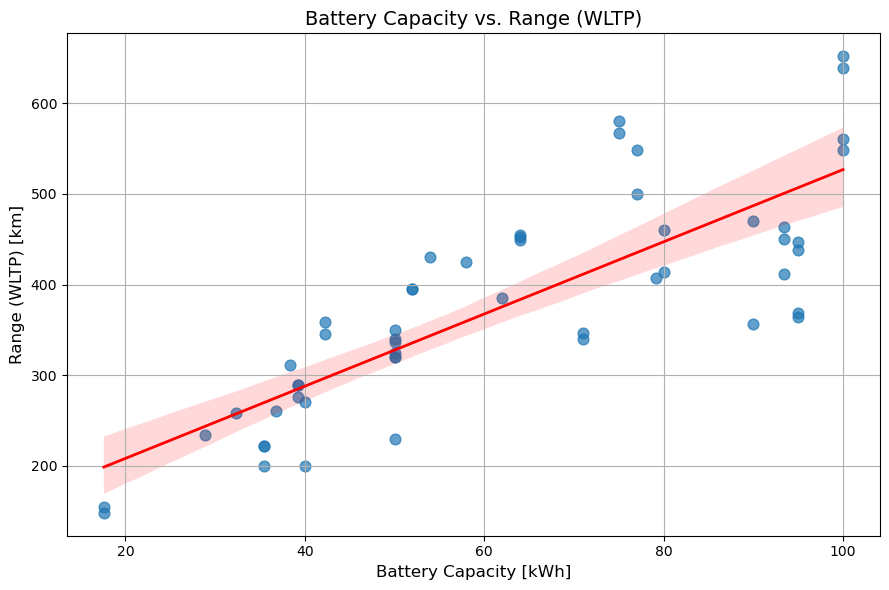

In [17]:
plt.figure(figsize=(9, 6))
sns.regplot(
    x="Battery capacity [kWh]",
    y="Range (WLTP) [km]",
    data=df,
    scatter_kws={"s": 60, "alpha": 0.7},
    line_kws={"color": "red", "linewidth": 2})
plt.title("Battery Capacity vs. Range (WLTP)", fontsize=14)
plt.xlabel("Battery Capacity [kWh]", fontsize=12)
plt.ylabel("Range (WLTP) [km]", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
## Task 4: Build an EV recommendation class. The class should allow users to input their
## budget, desired range, and battery capacity. The class should then return the top three EVs matching their criteria.
import pandas as pd

In [19]:
def recommend_evs(budget, min_range, min_battery):
    matches = df[
        (df["Minimal price (gross) [PLN]"] <= budget) &
        (df["Range (WLTP) [km]"] >= min_range) &
        (df["Battery capacity [kWh]"] >= min_battery)
    ]
    top_3 = matches.sort_values(by="Range (WLTP) [km]", ascending=False).head(3)
    return top_3

top_3 = recommend_evs(budget=600000, min_range=350, min_battery=80)
print(top_3)


                    Car full name   Make                    Model  \
42  Tesla Model S Long Range Plus  Tesla  Model S Long Range Plus   
43      Tesla Model S Performance  Tesla      Model S Performance   
44  Tesla Model X Long Range Plus  Tesla  Model X Long Range Plus   

    Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
42                       368990                525                  755   
43                       443990                772                 1140   
44                       407990                525                  755   

         Type of brakes Drive type  Battery capacity [kWh]  Range (WLTP) [km]  \
42  disc (front + rear)        4WD                   100.0                652   
43  disc (front + rear)        4WD                   100.0                639   
44  disc (front + rear)        4WD                   100.0                561   

    ...  Permissable gross weight [kg]  Maximum load capacity [kg]  \
42  ...                    

In [20]:
##  Task 5: Inferential Statistics– Hypothesis Testing:
import pandas as pd
from scipy.stats import ttest_ind

In [21]:
df = pd.read_excel("FEV_Data.xlsx", sheet_name="Auta elektryczne")

In [22]:
tesla_power = df[df["Make"] == "Tesla"]["Engine power [KM]"]
audi_power = df[df["Make"] == "Audi"]["Engine power [KM]"]

In [23]:
t_stat, p_test = ttest_ind(tesla_power, audi_power, equal_var=False)
print("T-test Result:", round(t_stat,3))
print("P-value Result:", round(p_test,4))

T-test Result: 1.794
P-value Result: 0.1068


In [ ]:
video link : https://drive.google.com/drive/folders/1dv-1OF_BxePgKmWvkIGZmFCstGwS1i1l?usp=drive_link